In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
sns.set()

In [49]:
def error_metrics(y_pred, y_observed, model_name = None, test = True):
    
    if isinstance(y_pred, np.ndarray):
        y_pred = y_pred
    else:
        y_pred = y_pred.to_numpy()

    if isinstance(y_observed, np.ndarray):
        y_observed = y_observed
    else:
        y_observed = y_observed.to_numpy()

    print(f'Error metrics for {model_name} \n')

    RMSE = np.sqrt(mean_squared_error(y_observed, y_pred))
    print(f'Root Mean Squared Error (RMSE): {round(RMSE, 3)}')

    MAE = mean_absolute_error(y_observed, y_pred)
    print(f'Mean Absolute Error (MAE): {round(MAE, 3)}')

    MAPE = (np.mean(np.abs((y_observed - y_pred) / y_observed)) * 100)
    print(f'Mean Absolute Percentage Error (MAPE): {round(MAPE, 3)} %')

    R2 = r2_score(y_observed, y_pred)
    print(f'Variance Score (R2): {round(R2, 3)}')

    if test:
        train_test = 'test'
    else:
        train_test = 'train'

    names = ['model', 'train_test', 'RMSE', 'MAE', 'MAPE', 'R2']
    values = [model_name, train_test, RMSE, MAE, MAPE, R2]
    list_error = list(zip(names, values))

    # for error in list_error:
    #     if error[0] in lstm_error:
    #         lstm_error[error[0]].append(error[1])
    #     else:
    #         lstm_error[error[0]] = [error[1]]

In [45]:
# creating function for plotting predicted vs actual energy values
def PredTrueReg(pred, truth, model_name=None):
    """
    Plots the observed energy consumption against the predicted energy consumption
    """
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    ax.scatter(truth, pred, alpha=0.7) 
    plt.xlabel("Observed Electric Consumption (MwH)")
    plt.ylabel("Predicted Electric Consumption (MwH)")
    plt.title(f"Observed VS Predicted Electric Consumption using {model_name}", fontsize=14)

    #plotting 45 deg line to see how the prediction differs from the observed values
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x, color='black')

In [46]:
def PlotPredictedTS(observed_ts, predicted_ts, model_name=None, observed_alpha = 0.5, predicted_alpha = 0.7):
    
    plt.figure(figsize=(16, 9))
    sns.lineplot(x= observed_ts.index, y=np.array(observed_ts.values), color='red', alpha=observed_alpha, label='Observed')
    sns.lineplot(x= observed_ts.index, y=predicted_ts, color='lightslategrey', alpha=predicted_alpha, label='Predicted')
    plt.title(f'Observed VS Predicted Energy Consumption using {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Energy Consumption (MwH)')

    plt.show()

In [6]:
# Importing the dataset
df = pd.read_csv('../Data/cleandata/CleanedRI.csv', parse_dates=['ts'], index_col='ts')
df = df.drop(['Unnamed: 0'], axis=1)
df['non_working'] = df.apply(lambda x: True if \
                                         ((x['non_working'] == 'non-working'))
                                         else False, axis = 1)
print('Data Frame Shape:', df.shape)
df.head()

Data Frame Shape: (113976, 14)


,zone,demand,drybulb,dewpnt,date,year,month,hour,day_of_week,day_of_year,weekend,holiday,trend,non_working
ts,,,,,,,,,,,,,,
2004-01-01 00:00:00,RI,744.0,41.0,27.0,2004-01-01,2004,1,0,Thu,1,False,True,7344.0,True
2004-01-01 01:00:00,RI,699.0,39.0,25.0,2004-01-01,2004,1,1,Thu,1,False,True,7345.0,True
2004-01-01 02:00:00,RI,666.0,40.0,25.0,2004-01-01,2004,1,2,Thu,1,False,True,7346.0,True
2004-01-01 03:00:00,RI,645.0,41.0,23.0,2004-01-01,2004,1,3,Thu,1,False,True,7347.0,True
2004-01-01 04:00:00,RI,643.0,40.0,18.0,2004-01-01,2004,1,4,Thu,1,False,True,7348.0,True


In [7]:
df['day_of_month'] = df.index.day
df['day_of_week (Num)'] = df.index.dayofweek
df['non_working'] = df.apply(lambda x: 1 if \
                                         ((x['holiday'] == True) or (x['day_of_week'] in ['Sat', 'Sun']))
                                         else 0, axis = 1)

In [8]:
# Dropping extra columns

df = df.drop('date', axis=1)
df = df.drop('day_of_week', axis=1)
df = df.drop('holiday', axis=1)
df = df.drop('weekend', axis=1)
df = df.drop('trend', axis=1)
df = df.drop('zone', axis=1)
df.head()

,demand,drybulb,dewpnt,year,month,hour,day_of_year,non_working,day_of_month,day_of_week (Num)
ts,,,,,,,,,,
2004-01-01 00:00:00,744.0,41.0,27.0,2004,1,0,1,1,1,3
2004-01-01 01:00:00,699.0,39.0,25.0,2004,1,1,1,1,1,3
2004-01-01 02:00:00,666.0,40.0,25.0,2004,1,2,1,1,1,3
2004-01-01 03:00:00,645.0,41.0,23.0,2004,1,3,1,1,1,3
2004-01-01 04:00:00,643.0,40.0,18.0,2004,1,4,1,1,1,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113976 entries, 2004-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   demand             113976 non-null  float64
 1   drybulb            113976 non-null  float64
 2   dewpnt             113976 non-null  float64
 3   year               113976 non-null  int64  
 4   month              113976 non-null  int64  
 5   hour               113976 non-null  int64  
 6   day_of_year        113976 non-null  int64  
 7   non_working        113976 non-null  int64  
 8   day_of_month       113976 non-null  int64  
 9   day_of_week (Num)  113976 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.6 MB


In [11]:
train_size = int(len(df) * 0.1)
test_size = int(len(df) - train_size)

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (11397, 10)
test shape: (102579, 10)


In [12]:
from sklearn.preprocessing import RobustScaler

f_columns = ['drybulb', 'dewpnt']

f_transformer = RobustScaler()
demand_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
demand_transformer = demand_transformer.fit(train[['demand']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['demand'] = demand_transformer.transform(train[['demand']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['demand'] = demand_transformer.transform(test[['demand']])

/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-12-41e13b917e98>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['demand'] = demand_transformer.transform(train[['demand']])
/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [13]:
df.head(2)

,demand,drybulb,dewpnt,year,month,hour,day_of_year,non_working,day_of_month,day_of_week (Num)
ts,,,,,,,,,,
2004-01-01 00:00:00,-0.789286,-0.178571,-0.28125,2004,1,0,1,1,1,3
2004-01-01 01:00:00,-0.950000,-0.250000,-0.34375,2004,1,1,1,1,1,3


In [14]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [15]:
TIME_STEPS = 24

X_train, y_train = create_dataset(train, train.demand, time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test, test.demand, time_steps=TIME_STEPS)

In [26]:
print('Sahpe:', X_test.shape)

Sahpe: (102555, 24, 10)


In [20]:
from tensorflow import keras

In [22]:
my_model = keras.models.load_model('../LSTM_Model.h5')
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 24, 120)           62880     
                                                                 
 lstm_10 (LSTM)              (None, 24, 80)            64320     
                                                                 
 lstm_11 (LSTM)              (None, 40)                19360     
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 146,601
Trainable params: 146,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
y_pred = my_model.predict(X_test)
y_pred_train = my_model.predict(X_train)

356/356 [==============================] - 4s 11ms/step


In [28]:
y_train_inv = demand_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = demand_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_test_inv = demand_transformer.inverse_transform(y_pred)
y_pred_train_inv = demand_transformer.inverse_transform(y_pred_train)

In [29]:
y_train_inv

array([[703., 674., 660., ..., 925., 960., 999.]])

In [38]:
y_test_inv = pd.DataFrame(y_test_inv[0], index=df.index[-len(y_test_inv[0]):])
y_test_inv = pd.Series(y_test_inv[0])
y_test_inv

ts
2005-04-20 21:00:00    977.000
2005-04-20 22:00:00    873.000
2005-04-20 23:00:00    769.000
2005-04-21 00:00:00    697.000
2005-04-21 01:00:00    650.000
                        ...   
2016-12-31 19:00:00    979.016
2016-12-31 20:00:00    930.341
2016-12-31 21:00:00    883.853
2016-12-31 22:00:00    832.257
2016-12-31 23:00:00    779.591
Name: 0, Length: 102555, dtype: float64

In [37]:
LSTM_pred = pd.DataFrame(y_pred_test_inv, index=df.index[-len(y_test):])
LSTM_pred = pd.Series(LSTM_pred[0])
LSTM_pred

ts
2005-04-20 21:00:00    977.231873
2005-04-20 22:00:00    866.398376
2005-04-20 23:00:00    764.113037
2005-04-21 00:00:00    697.169861
2005-04-21 01:00:00    658.226929
                          ...    
2016-12-31 19:00:00    982.527649
2016-12-31 20:00:00    927.056152
2016-12-31 21:00:00    872.002441
2016-12-31 22:00:00    818.850098
2016-12-31 23:00:00    747.456848
Name: 0, Length: 102555, dtype: float32

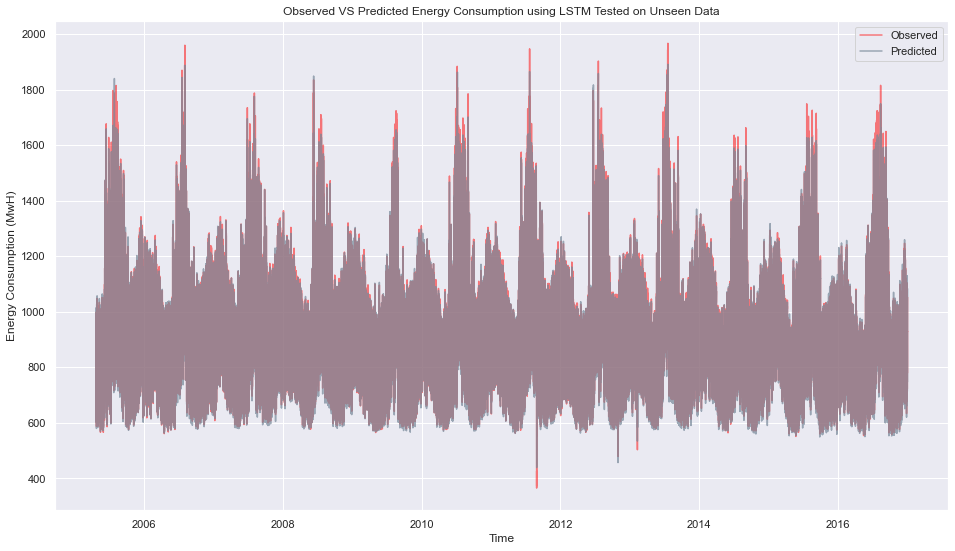

In [39]:
PlotPredictedTS(y_test_inv, LSTM_pred, model_name='LSTM Tested on Unseen Data')

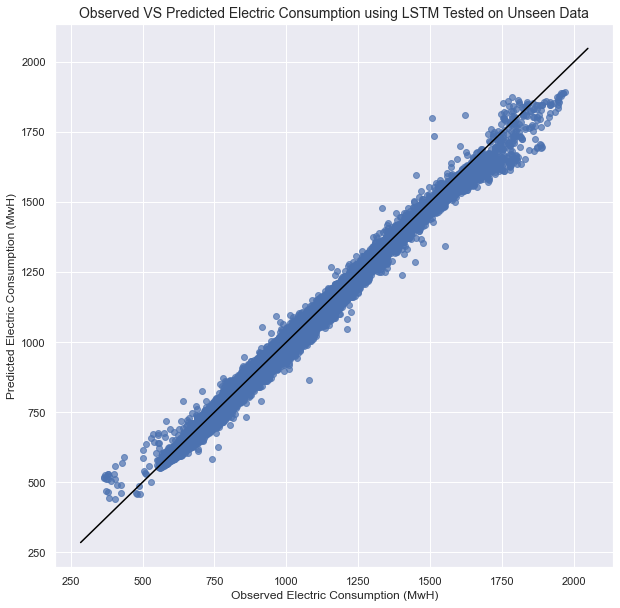

In [41]:
PredTrueReg(LSTM_pred, y_test_inv, model_name='LSTM Tested on Unseen Data')

In [50]:
error_metrics(LSTM_pred, y_test_inv, model_name='LSTM Tested on Unseen Data')

Error metrics for LSTM Tested on Unseen Data 

Root Mean Squared Error (RMSE): 16.226
Mean Absolute Error (MAE): 11.435
Mean Absolute Percentage Error (MAPE): 1.231 %
Variance Score (R2): 0.994
